# 경사 하강법(Gradient_descent)

* 머신 러닝의 목적은 목적(비용,손실) 함수를 최소로 만드는 계수들(w0,w1,...)을 찾는 것.
* 목적 함수
 * 회귀 문제인 경우 목적 함수는 MSE(w)
 * 회귀문제에서는 w에 대한 2차 함수에서 최솟값의 위치를 찾는 문제와 비슷.
 * 경사 하강법 : 최솟값의 위치를 찾는 알고리즘 중 하나.
    * 목적 함수의 임의의 위치에서 시작
    * 그 위치에서의 접선의 기울기(Graidient)를 계산하고, 접선의 기울기의 반대방향으로 w값을 변경시킨다.
     * 접선의 기울기가 음수인 경우에는 오른쪽으로
     * 접선의 기울기가 양수인 경우에는 왼쪽으로
    * 위 과정을 충분히 반복하면 목적함수가 최솟값이 되는 위치 w를 찾을 수 있다. 

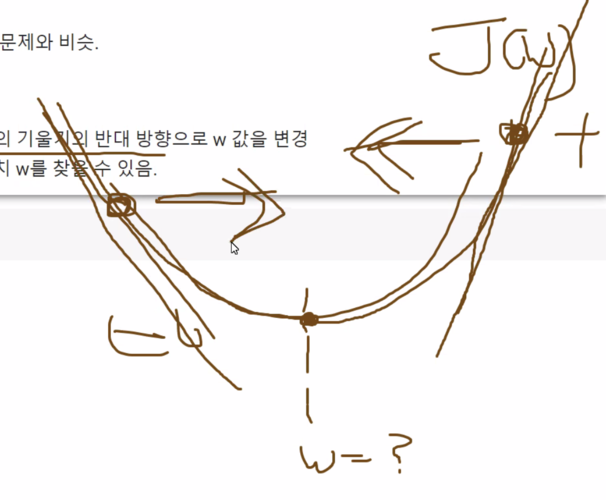

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

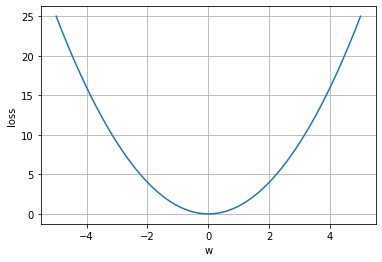

In [2]:
w = np.arange(-5, 5 , 0.001) # [-5, -4.999,-4.998, ..., 4.998,4.999]
loss = w **2 
# 2차 함수 만들기

plt.plot(w,loss)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [3]:
# 임의의 w를 선택
w_init = 4

In [4]:
# 선택한 w에서 목적(손실)함수의 접선의 기울기 계산
grad = 2 * w_init
# y= w**2 -> 2w

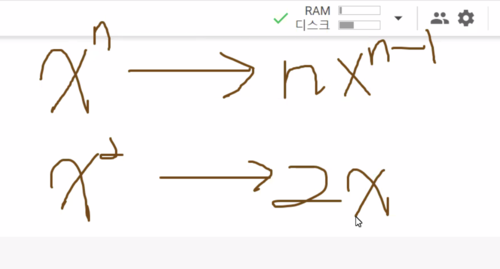

In [5]:
# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - grad * 0.1
w_next

3.2

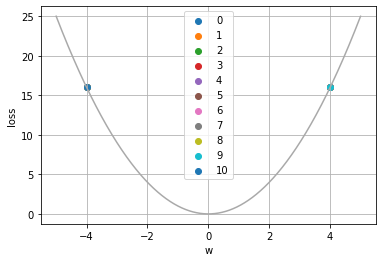

In [6]:
w = np.arange(-5,5,0.001)
loss = w **2
plt.plot(w, loss, color='darkgray')

#loss의 최솟값까지 이동하기 위해서 임의의 w에서 시작
w_init = -4
loss_init = w_init **2 #임의의 시작값에서의 목적 함수 리턴값
plt.scatter(w_init, loss_init, label='0')

# 학습률(learning_rate = 0.1) gradient가 감소하는 방향으로 얼마나 빠르게 이동할 지를 결정하는 파라미터
learning_rate = 1
for n in range(1,11): #10번 반복
    #현재 위치에서 gradient를 계산
    grad = 2* w_init
    #현재 위치에서 gradient가 감소하는 방향으로 약간 이동
    w_next = w_init - grad * learning_rate
    #이동한 위치에서의 목적 함수 리턴값
    loss_next = w_next **2
    plt.scatter(w_next, loss_next, label=f'{n}')
    #다음 이동 위치를 계산하기 위해서 현재 위치를 바뀐 새 위치로 변경
    w_init = w_next

plt.grid()
plt.legend()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

**학습률(learning rate) hyperparameter**

* 학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
* 학습률이 큰 경우에는 최솟값을 향해서 빠르게 움직이거나 또는 불안정하게 움직일 수 있음.
* 학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수 있음.
    * 수렴할 때까지 최대 반복 횟수를 늘려줌.
    * 학습률을 키워줌.
* 학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 발생하기도 함.
    * 학습률을 줄여야 함.
* ML 알고리즘 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 작게 줄여 나가는 알고리즘도 있음.
 * 에포크 : 전체 훈련 셋의 모든 샘플들에 대해서 gradient를 한번씩 모두 계산하는 것

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

## fish 데이터

In [8]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [9]:
fish = pd.read_csv(fish_csv)

In [10]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [11]:
# 농어(Perch)데이터
perch = fish[fish.Species=='Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [12]:
X =perch.iloc[:,2:].values.copy()
y = perch['Weight'].values.copy()

In [13]:
X[:3]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ]])

In [14]:
y[:3]

array([ 5.9, 32. , 40. ])

In [15]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [16]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

In [17]:
sgd = SGDRegressor() # 모델 객체 생성
# max_iter: 최대 반복 횟수
# eta0: 학습률 초깃값
# learning_rate: 학습률을 변화시키는 방법

In [18]:
sgd.fit(X_tr,y_tr) #모델 훈련

SGDRegressor()

In [19]:
sgd.coef_

array([ 1.46338404e+09, -1.34001564e+10,  3.59315520e+09, -2.19869985e+10])

In [20]:
sgd.intercept_

array([-1.80049981e+10])

In [21]:
tr_pred = sgd.predict(X_tr)
tr_pred[:5]

array([-3.16355847e+11, -3.57108607e+11, -3.00595409e+11, -2.88634369e+11,
       -5.88638979e+11])

In [22]:
sgd.score(X_tr, y_tr)

-1.851934752345394e+18

* 훈련 셋의 샘플 개수가 너무 작아서 1,000번 반복(epoch)만으로는 최적의 값으로 찾아갈 수 없었음.

* 해결방법:
 * 최대 반복 횟수를 늘려줌.
 * 학습률을 크게 만들어줌.
 * 규제의 크기를 줄여줌 

In [23]:
sgd = SGDRegressor(max_iter=1_000_000_000,random_state=42)
sgd.fit(X_tr,y_tr)
sgd.score(X_tr,y_tr)

-4.016900437110443e+18

In [24]:
sgd = SGDRegressor(max_iter=1_000_000,
                   learning_rate='constant',
                   eta0=1.0,
                   random_state=42)
sgd.fit(X_tr,y_tr)
sgd.score(X_tr,y_tr)

-2.795200441965098e+25

# Boston 주택 가격 데이터 셋

In [25]:
from sklearn.datasets import fetch_california_housing

In [26]:
housing = fetch_california_housing()

In [27]:
type(housing) #> bunch : dic와 비슷하게 key: value 쌍으로 아이템들이 저장된데이터타입

sklearn.utils.Bunch

In [28]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [29]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
X =housing.data #2차원 배열

In [31]:
y = housing.target #1차원 배열

In [32]:
housing.feature_names # columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [33]:
housing.target_names #주택가격의 중앙값

['MedHouseVal']

In [34]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
housing_df[housing.target_names[0]] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 데이터 프레임 탐색

In [36]:
import seaborn as sns

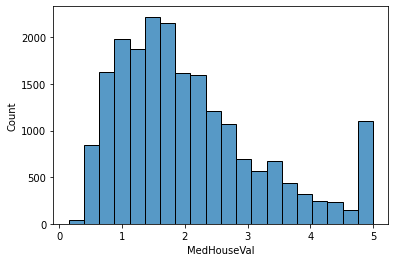

In [37]:
#주택 가격 중앙값(target)의 분포
sns.histplot(x='MedHouseVal', data=housing_df , bins=20)
plt.show()

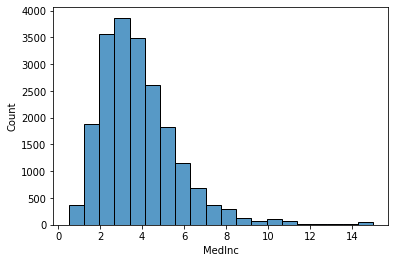

In [38]:
# 소득 중앙값 분포
sns.histplot(x='MedInc', data=housing_df, bins=20)
plt.show()

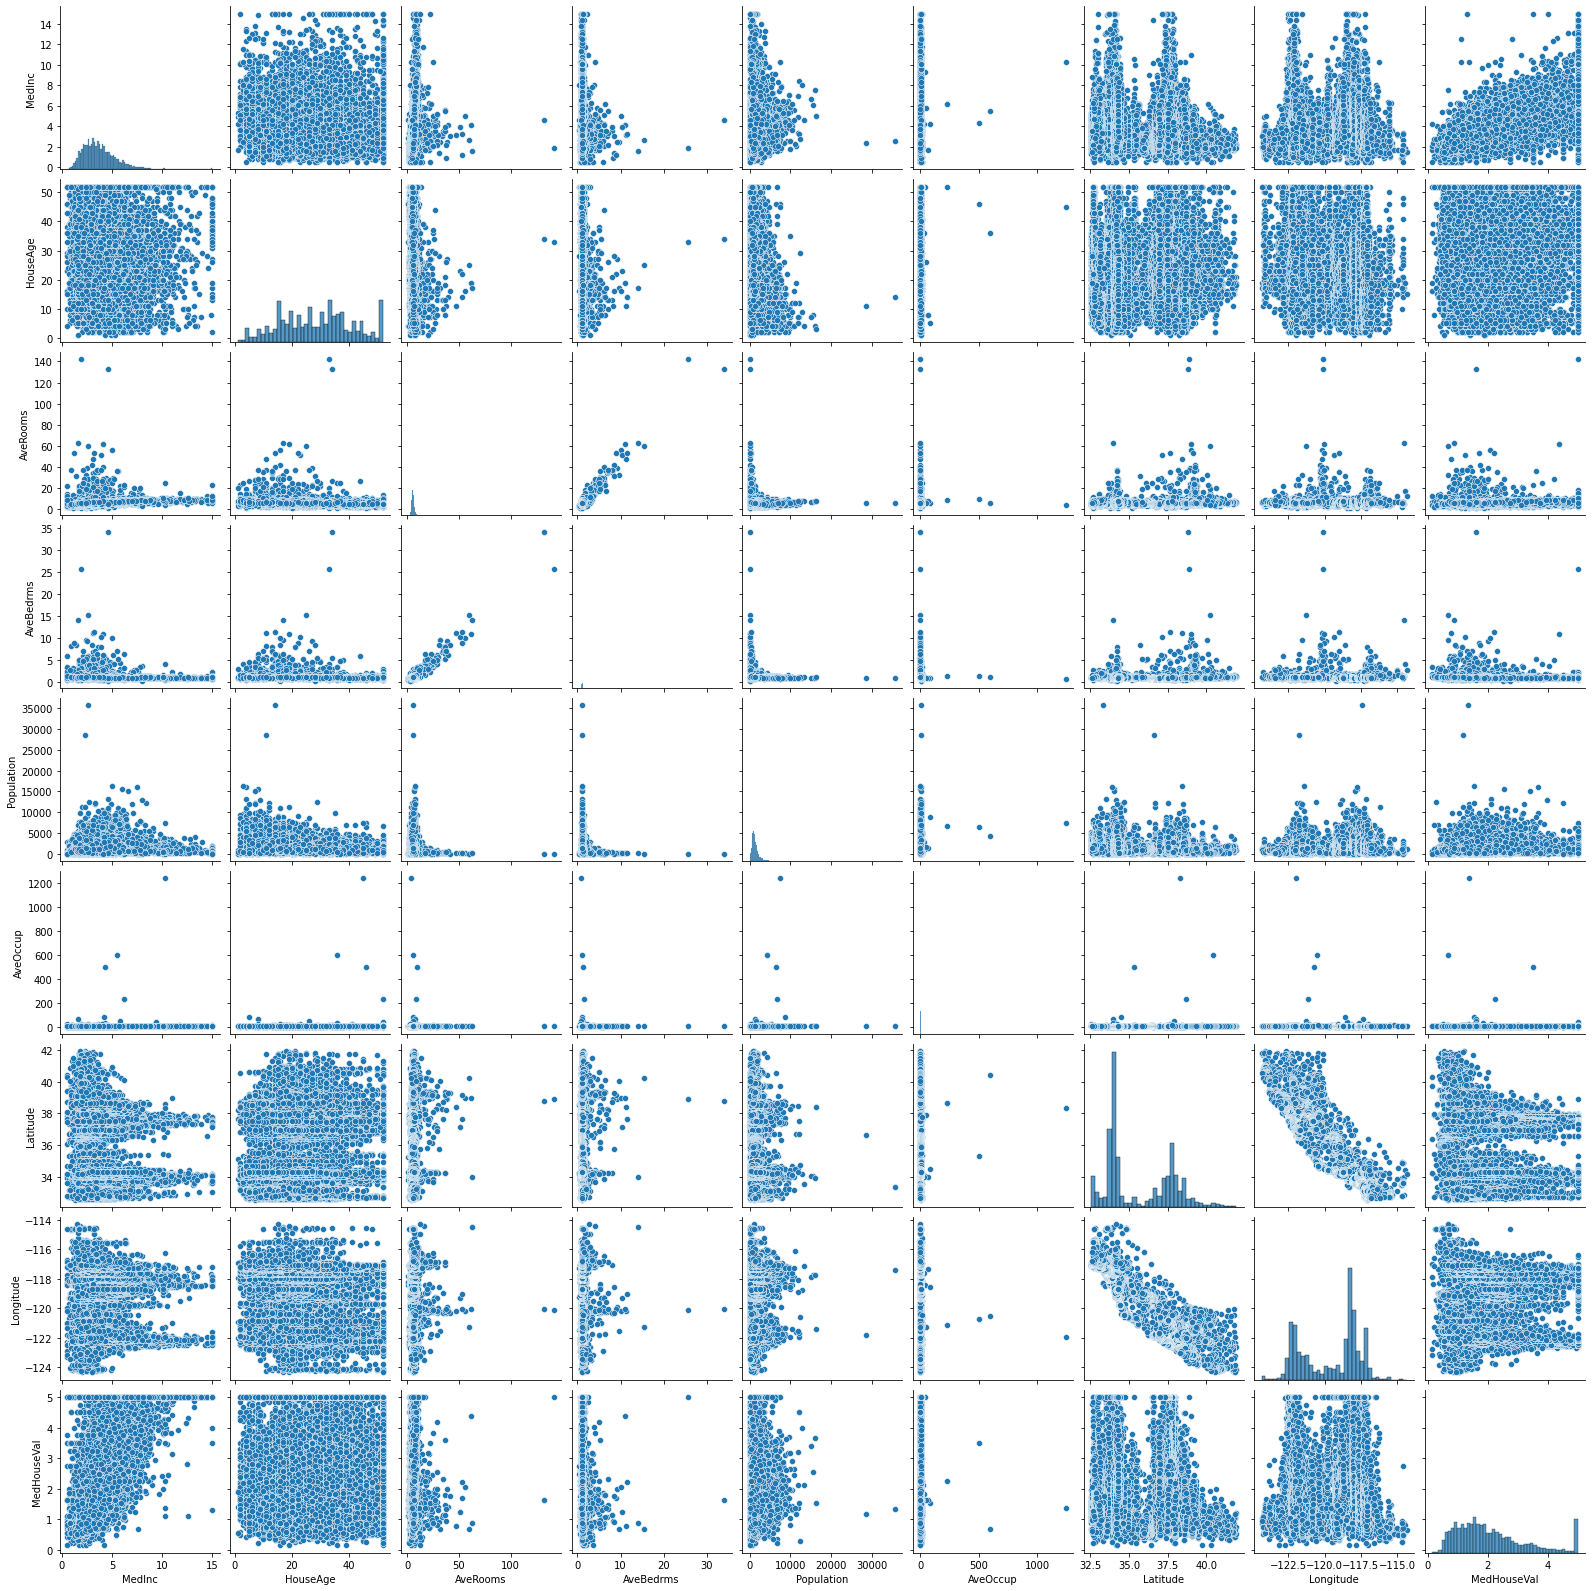

In [39]:
sns.pairplot(data=housing_df)
# 대각선은 히스토그램, 나머지는 상관관계
plt.show()

## latitude(위도), longitude(경도) 산점도


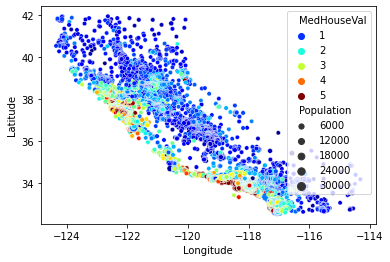

In [40]:
sns.scatterplot(x='Longitude', y='Latitude', data=housing_df,
                size='Population', hue= 'MedHouseVal', palette=plt.get_cmap('jet'))
plt.show()

In [41]:
## imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge, ElasticNet

## 훈련/테스트 셋 분리

In [42]:
X.shape, y.shape

((20640, 8), (20640,))

In [43]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [44]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((15480, 8), (5160, 8), (15480,), (5160,))

## SGD Regressor

In [45]:
#모델 생성
model = Pipeline([('scaler', StandardScaler()),
                 ('reg', SGDRegressor())])

In [46]:
#모델 훈련
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', SGDRegressor())])

In [47]:
# (기울기) 계수찾기
model['reg'].coef_

array([ 0.82788797,  0.12378628, -0.28252708,  0.37295397,  0.01323166,
       -0.0518306 , -0.89513943, -0.86874519])

In [48]:
# y절편 찾기
# y = y절편 + 기울기 * 변수 
model['reg'].intercept_

array([2.07149296])

In [49]:
print('train r2:', model.score(X_tr,y_tr))
print('test r2:', model.score(X_te,y_te))

train r2: 0.6081366985619219
test r2: 0.5811021327826996


In [50]:
tr_pred  = model.predict(X_tr)
tr_pred[:5]

array([2.34381069, 3.12814899, 2.21886352, 3.14702405, 0.85091618])

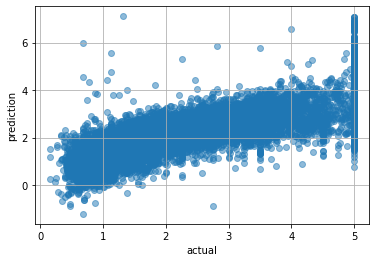

In [51]:
# 예측값 ~ 실젯값 scatter plot
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [52]:
te_pred = model.predict(X_te)
te_pred

array([0.73634525, 1.79015352, 2.71599222, ..., 1.73842753, 2.32675193,
       3.49377621])

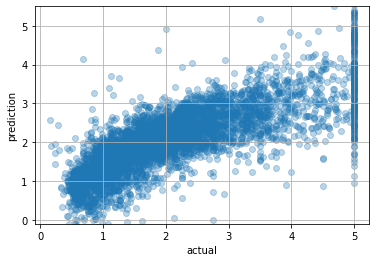

In [53]:
# 테스트 셋에서의 예측값과 실제값 비교
plt.scatter(y_te, te_pred, alpha=0.3)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.ylim((-0.1,5.5))
plt.show()

## LinearRegression

In [54]:
model = Pipeline([('scaler',StandardScaler()),
                  ('reg', LinearRegression())])

In [55]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [56]:
print('train r2:', model.score(X_tr,y_tr))
print('test r2:', model.score(X_te,y_te))

train r2: 0.609873031052925
test r2: 0.5910509795491351


In [57]:
tr_pred  = model.predict(X_tr)
tr_pred[:5]

array([2.35870897, 3.14117532, 2.2227708 , 3.17998867, 0.85244297])

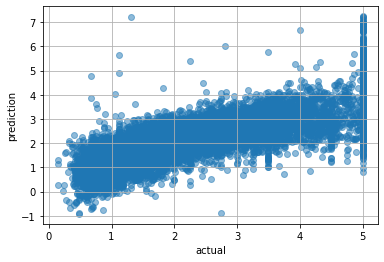

In [58]:
# 훈련 셋에서의 예측값과 실제값 비교
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [59]:
te_pred = model.predict(X_te)
te_pred

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

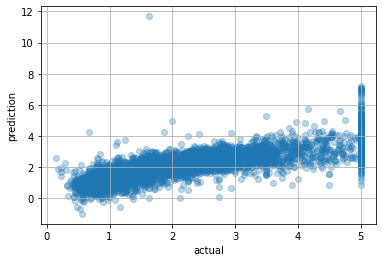

In [60]:
# 테스트 셋에서의 예측값과 실제값 비교
plt.scatter(y_te, te_pred, alpha=0.3)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

## Lasso

In [92]:
model = Pipeline([('scaler',StandardScaler()),
                  ('reg', Lasso(alpha=0.001))])

In [93]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', Lasso(alpha=0.001))])

In [94]:
tr_pred = model.predict(X_tr)
tr_pred

array([2.35969919, 3.13668763, 2.22355442, ..., 2.03414168, 2.83827302,
       2.26737495])

In [95]:
model.score(X_tr,y_tr)

0.6098307934685173

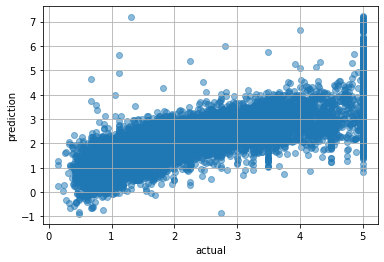

In [96]:
# 훈련 셋에서의 예측값과 실제값 비교
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [97]:
te_pred = model.predict(X_te)
te_pred

array([0.73086725, 1.76365972, 2.69744276, ..., 1.71855672, 2.35708737,
       3.52225794])

In [98]:
model.score(X_te,y_te)

0.5919159579157592

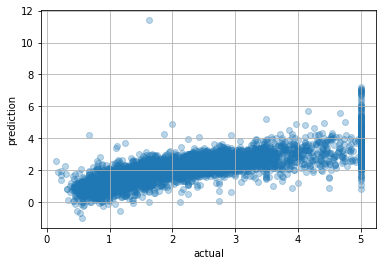

In [99]:
# 테스트 셋에서의 예측값과 실제값 비교
plt.scatter(y_te, te_pred, alpha=0.3)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

## Ridge()

In [69]:
model = Pipeline([('scaler',StandardScaler()),
                  ('reg', Ridge())])

In [70]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', Ridge())])

In [71]:
tr_pred = model.predict(X_tr)
tr_pred

array([2.35870936, 3.14089154, 2.22268088, ..., 2.03937167, 2.84122846,
       2.27645442])

In [72]:
model.score(X_tr,y_tr)

0.6098729521397361

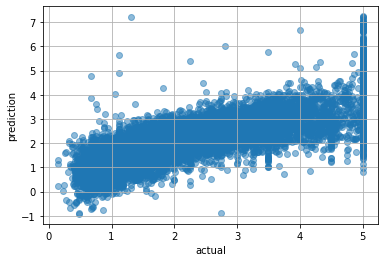

In [73]:
# 훈련 셋에서의 예측값과 실제값 비교
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [74]:
te_pred = model.predict(X_te)
te_pred

array([0.72449694, 1.76659767, 2.71113514, ..., 1.72370052, 2.34736533,
       3.52899359])

In [75]:
model.score(X_te,y_te)

0.5910746659462227

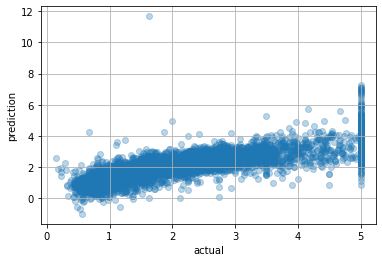

In [76]:
# 테스트 셋에서의 예측값과 실제값 비교
plt.scatter(y_te, te_pred, alpha=0.3)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

## Elastic Net()

In [77]:
model = Pipeline([('scaler',StandardScaler()),
                  ('reg', ElasticNet())])

In [78]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNet())])

In [79]:
tr_pred = model.predict(X_tr)
tr_pred

array([2.1051208 , 2.22232557, 2.07456994, ..., 1.97266129, 2.26086602,
       1.93551798])

In [80]:
model.score(X_tr,y_tr)

0.2058396121038485

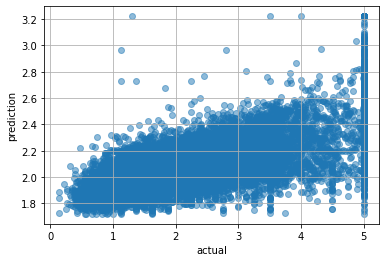

In [81]:
# 훈련 셋에서의 예측값과 실제값 비교
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [82]:
te_pred = model.predict(X_te)
te_pred

array([1.84296502, 1.93094364, 2.02913692, ..., 1.89321042, 2.38171371,
       2.35534393])

In [83]:
model.score(X_te,y_te)

0.20422126068702173

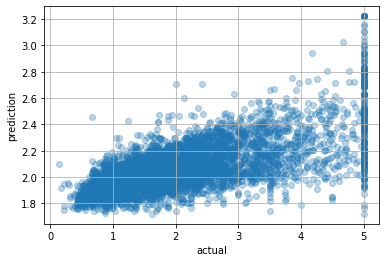

In [84]:
# 테스트 셋에서의 예측값과 실제값 비교
plt.scatter(y_te, te_pred, alpha=0.3)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

## 함수정의

In [85]:
def multi_regression(estimator, X_tr, y_tr, X_te, y_te):
    train_scores = [] # 규제 크기에 따른 훈련 셋에서의 결정계수를 저장할 리스트
    test_scores =[] # 규제 크기에 따른 테스트 셋에서의 결정계수를 저장할 리스트
    # 머신 러닝 모델 생성( Scaler > Estimator)
    scaler = StandardScaler()
    if estimator == 'l1':
        reg = Lasso()
    elif estimator == 'l2': 
        reg = Ridge()
    elif estimator == 'l3': 
        reg = ElasticNet()
    elif estimator == 'l4':
        reg = LinearRegression()
    else:
        raise ValueError('estimator는 "l1", "l2", 또는 "elastic"이어야 함!')
    model = Pipeline([('scaler',scaler),
                    ('reg', reg)])
    # 모델 훈련
    model.fit(X_tr,y_tr)
    train_r2 = model.score(X_tr,y_tr) # 훈련 셋의 결정계수
    train_scores.append(train_r2)
    test_r2 = model.score(X_te,y_te) # 테스트 셋의 결정계수
    test_scores.append(test_r2)

    # 리스트의 내용을 출력
    print('train scores:', train_scores)
    print('test scores:', test_scores)

    # 훈련 셋에서의 예측값 비교
    fig, ax = plt. subplots(1,2, figsize=(12,8))
    ax[0].scatter(y_tr, tr_pred, alpha=0.3)
    ax[0].grid()
    # Axes.grid()함수를 갖고 있어서 각각 grid를 적용해줌.
    ax[1].scatter(y_te, te_pred, alpha=0.3)
    ax[1].grid()
    plt.xlabel('actual')
    plt.ylabel('prediction')
    plt.show()

train scores: [0.6098729521397361]
test scores: [0.5910746659462227]


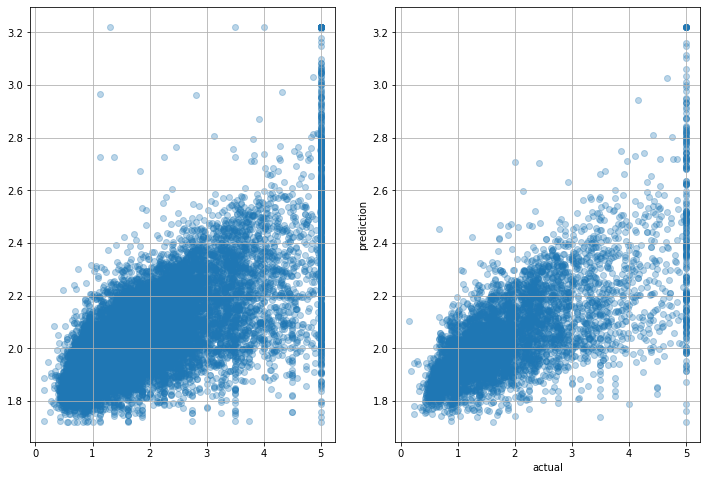

In [91]:
multi_regression('l2',X_tr,y_tr,X_te,y_te)